- Exercici 1
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [41]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#cargamos el data set a un dataframe de pandas
df = pd.read_csv('DelayedFlights.csv')

#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [42]:
#miramos la forma
df.shape

(1936758, 30)

In [43]:
#echamos un vistazo a los datos que hay
df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [44]:
#añadimos una columna que agrupe en una sola el día, mes y año
df['Data'] = df['DayofMonth'].map(str) + '-' + df['Month'].map(str) + '-' + df['Year'].map(str)

#ordenamos por fecha
df.sort_values(['Data'])

#nos quedamos con las columnas que nos interesan
new_df = df.loc[:, ['Data', 'UniqueCarrier', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'ArrDelay', 'DepDelay', 'Distance', 'Cancelled', 'AirTime']] 



new_df.head(10)

,Data,UniqueCarrier,DepTime,ArrTime,ActualElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,AirTime
0,3-1-2008,WN,2003.0,2211.0,128.0,-14.0,8.0,810,0,116.0
1,3-1-2008,WN,754.0,1002.0,128.0,2.0,19.0,810,0,113.0
2,3-1-2008,WN,628.0,804.0,96.0,14.0,8.0,515,0,76.0
3,3-1-2008,WN,1829.0,1959.0,90.0,34.0,34.0,515,0,77.0
4,3-1-2008,WN,1940.0,2121.0,101.0,11.0,25.0,688,0,87.0
5,3-1-2008,WN,1937.0,2037.0,240.0,57.0,67.0,1591,0,230.0
6,3-1-2008,WN,706.0,916.0,130.0,1.0,6.0,828,0,106.0
7,3-1-2008,WN,1644.0,1845.0,121.0,80.0,94.0,828,0,107.0
8,3-1-2008,WN,1029.0,1021.0,52.0,11.0,9.0,162,0,37.0
9,3-1-2008,WN,1452.0,1640.0,228.0,15.0,27.0,1489,0,213.0


In [45]:
#miramos si hay filas duplicadas
print(new_df.shape)
sin_dupl = new_df.drop_duplicates()
print(sin_dupl.shape)

#las eliminamos del dataframe
new_df = sin_dupl
print(new_df.shape[0])

(1936758, 10)
(1936755, 10)
1936755


Exercici 2
Fes un informe complet del data set:.

- Resumeix estadísticament les columnes d’interès
- Troba quantes dades faltants hi ha per columna
- Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
- Taula de les aerolínies amb més endarreriments acumulats
- Quins són els vols més llargs? I els més endarrerits?
- Etc.

In [46]:
#antes que nada, transformaremos el tipo de dato de algunas variables
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936755 entries, 0 to 1936757
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Data               object 
 1   UniqueCarrier      object 
 2   DepTime            float64
 3   ArrTime            float64
 4   ActualElapsedTime  float64
 5   ArrDelay           float64
 6   DepDelay           float64
 7   Distance           int64  
 8   Cancelled          int64  
 9   AirTime            float64
dtypes: float64(6), int64(2), object(2)
memory usage: 162.5+ MB


In [47]:
new_df.UniqueCarrier.unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [48]:
new_df.UniqueCarrier = new_df.UniqueCarrier.astype('category')
new_df.Data = new_df.Data.astype('datetime64')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936755 entries, 0 to 1936757
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Data               datetime64[ns]
 1   UniqueCarrier      category      
 2   DepTime            float64       
 3   ArrTime            float64       
 4   ActualElapsedTime  float64       
 5   ArrDelay           float64       
 6   DepDelay           float64       
 7   Distance           int64         
 8   Cancelled          int64         
 9   AirTime            float64       
dtypes: category(1), datetime64[ns](1), float64(6), int64(2)
memory usage: 149.6 MB


In [49]:
#Resumeix estadísticament les columnes d’interès
new_df.describe().round(2)

,DepTime,ArrTime,ActualElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,AirTime
count,1936755.00,1929645.00,1928368.00,1928368.00,1936755.00,1936755.00,1936755.00,1928368.00
mean,1518.53,1610.14,133.31,42.20,43.19,765.69,0.00,108.28
std,450.49,548.18,72.06,56.78,53.40,574.48,0.02,68.64
min,1.00,1.00,14.00,-109.00,6.00,11.00,0.00,0.00
25%,1203.00,1316.00,80.00,9.00,12.00,338.00,0.00,58.00
50%,1545.00,1715.00,116.00,24.00,24.00,606.00,0.00,90.00
75%,1900.00,2030.00,165.00,56.00,53.00,998.00,0.00,137.00
max,2400.00,2400.00,1114.00,2461.00,2467.00,4962.00,1.00,1091.00


In [50]:
new_df.corr()

,DepTime,ArrTime,ActualElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,AirTime
DepTime,1.000000,0.458934,-0.047039,0.127018,0.139254,-0.056003,0.002280,-0.054830
ArrTime,0.458934,1.000000,-0.013594,-0.050948,-0.053024,-0.027750,NaN,-0.017684
ActualElapsedTime,-0.047039,-0.013594,1.000000,0.068129,0.018492,0.952980,NaN,0.976660
ArrDelay,0.127018,-0.050948,0.068129,1.000000,0.952927,-0.029853,NaN,-0.000189
DepDelay,0.139254,-0.053024,0.018492,0.952927,1.000000,-0.007718,0.016542,-0.002754
Distance,-0.056003,-0.027750,0.952980,-0.029853,-0.007718,1.000000,-0.005060,0.980294
Cancelled,0.002280,NaN,NaN,NaN,0.016542,-0.005060,1.000000,NaN
AirTime,-0.054830,-0.017684,0.976660,-0.000189,-0.002754,0.980294,NaN,1.000000


<Figure size 576x432 with 0 Axes>

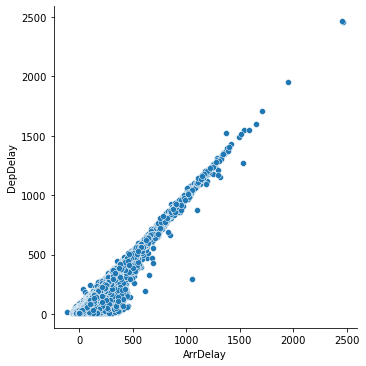

In [52]:
#la tabla de correlaciones nos muestra que hay cierta relación, por ejemplo, entre DepDelay y ArrDelay
#en principio parece lógico: cuanto más tarde sale el avión, más retraso hay respecto a la hora estimada de llegada

plt.figure(figsize=(8,6))
sns.relplot(x='ArrDelay', y='DepDelay', data=new_df)

In [12]:
#Miramos el porcentaje de valores vacíos que hay por columna
(new_df.isnull().sum() / len(new_df)) * 100 #porcentaje de valores vacíos

Data                 0.000000
UniqueCarrier        0.000000
DepTime              0.000000
ArrTime              0.367109
ActualElapsedTime    0.433044
ArrDelay             0.433044
DepDelay             0.000000
Distance             0.000000
Cancelled            0.000000
AirTime              0.433044
dtype: float64

In [14]:
#velocidad media en millas/hora
new_df['VelMitjana'] = new_df['Distance'] / (new_df['AirTime'] / 60)
new_df.head(5)

,Data,UniqueCarrier,DepTime,ArrTime,ActualElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,AirTime,VelMitjana
0,2008-03-01,WN,2003.0,2211.0,128.0,-14.0,8.0,810,0,116.0,418.965517
1,2008-03-01,WN,754.0,1002.0,128.0,2.0,19.0,810,0,113.0,430.088496
2,2008-03-01,WN,628.0,804.0,96.0,14.0,8.0,515,0,76.0,406.578947
3,2008-03-01,WN,1829.0,1959.0,90.0,34.0,34.0,515,0,77.0,401.298701
4,2008-03-01,WN,1940.0,2121.0,101.0,11.0,25.0,688,0,87.0,474.482759


In [55]:
#vuelo con retraso o no
new_df['Retraso'] = (df['ArrDelay'] > 0).astype('category')
new_df.head(5)

,Data,UniqueCarrier,DepTime,ArrTime,ActualElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,AirTime,Retraso
0,2008-03-01,WN,2003.0,2211.0,128.0,-14.0,8.0,810,0,116.0,False
1,2008-03-01,WN,754.0,1002.0,128.0,2.0,19.0,810,0,113.0,True
2,2008-03-01,WN,628.0,804.0,96.0,14.0,8.0,515,0,76.0,True
3,2008-03-01,WN,1829.0,1959.0,90.0,34.0,34.0,515,0,77.0,True
4,2008-03-01,WN,1940.0,2121.0,101.0,11.0,25.0,688,0,87.0,True


In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936755 entries, 0 to 1936757
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Data               datetime64[ns]
 1   UniqueCarrier      category      
 2   DepTime            float64       
 3   ArrTime            float64       
 4   ActualElapsedTime  float64       
 5   ArrDelay           float64       
 6   DepDelay           float64       
 7   Distance           int64         
 8   Cancelled          int64         
 9   AirTime            float64       
 10  Retraso            category      
dtypes: category(2), datetime64[ns](1), float64(6), int64(2)
memory usage: 151.5 MB


In [39]:
#Taula de les aerolínies amb més endarreriments acumulats

media_aerolineas = new_df.groupby(['UniqueCarrier']).mean() #agrupamos por aerolíneas y le pedimos la media de cada variable (columna)
media_aerolineas['ArrDelay'].sort_values(ascending=False) #nos ordena la media de retraso de cada aerolínea de mayor a menor

UniqueCarrier
YV    55.287049
B6    55.088739
OH    51.016968
XE    50.181217
UA    47.784399
EV    47.554255
9E    46.936493
AA    46.561553
OO    45.370587
MQ    45.295058
NW    43.911000
FL    43.683157
CO    40.568449
DL    39.881507
US    36.445019
AS    36.060882
HA    34.209449
WN    30.087964
F9    27.937779
AQ    21.255376
Name: ArrDelay, dtype: float64

<AxesSubplot:xlabel='UniqueCarrier', ylabel='ArrDelay'>

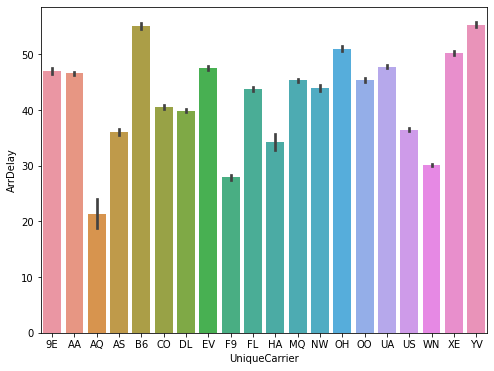

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x='UniqueCarrier', y='ArrDelay', data=new_df)

In [17]:
#Quins són els vols més llargs?

new_df.sort_values(['Distance'], ascending=False).head(10)

,Data,UniqueCarrier,DepTime,ArrTime,ActualElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,AirTime,VelMitjana,Retraso
1930578,2008-08-12,CO,104.0,1619.0,615.0,299.0,249.0,4962,0,583.0,510.668954,True
877910,2008-11-05,CO,2002.0,1209.0,607.0,39.0,7.0,4962,0,578.0,515.086505,True
718351,2008-03-04,CO,1357.0,1839.0,642.0,29.0,22.0,4962,0,619.0,480.969305,True
1519995,2008-09-25,CO,1414.0,1825.0,611.0,15.0,39.0,4962,0,586.0,508.054608,True
364920,2008-12-02,CO,1338.0,1926.0,648.0,6.0,18.0,4962,0,573.0,519.581152,True
1922725,2008-12-28,CO,1436.0,2004.0,628.0,29.0,61.0,4962,0,605.0,492.099174,True
1414886,2008-08-17,CO,1431.0,1831.0,600.0,21.0,56.0,4962,0,581.0,512.426850,True
556358,2008-03-18,CO,2207.0,1326.0,559.0,16.0,22.0,4962,0,522.0,570.344828,True
1519768,2008-09-13,CO,2004.0,1128.0,564.0,-2.0,9.0,4962,0,541.0,550.314233,False
556357,2008-07-03,CO,2258.0,1409.0,611.0,59.0,13.0,4962,0,581.0,512.426850,True


In [18]:
#I els més endarrerits?

new_df.sort_values(['ArrDelay'], ascending=False).head(10)

,Data,UniqueCarrier,DepTime,ArrTime,ActualElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,AirTime,VelMitjana,Retraso
322516,2008-03-02,NW,1117.0,2256.0,459.0,2461.0,2457.0,3972,0,437.0,545.354691,True
686014,2008-10-04,NW,724.0,858.0,154.0,2453.0,2467.0,930,0,132.0,422.727273,True
839306,2008-06-05,NW,2.0,254.0,172.0,1951.0,1952.0,1085,0,145.0,448.965517,True
1009553,2008-06-20,MQ,2140.0,2252.0,72.0,1707.0,1710.0,304,0,50.0,364.800000,True
1881639,2008-12-19,NW,1602.0,1921.0,259.0,1655.0,1597.0,1124,0,192.0,351.250000,True
1497823,2008-01-09,NW,906.0,1048.0,102.0,1583.0,1552.0,282,0,75.0,225.600000,True
685437,2008-04-27,NW,1818.0,1942.0,84.0,1542.0,1545.0,449,0,63.0,427.619048,True
163379,2008-05-01,AA,800.0,1452.0,292.0,1525.0,1275.0,1811,0,207.0,524.927536,True
1214839,2008-07-16,NW,820.0,1325.0,185.0,1510.0,1518.0,1399,0,160.0,524.625000,True
521096,2008-03-21,NW,705.0,811.0,66.0,1490.0,1490.0,200,0,47.0,255.319149,True


- Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

In [57]:
new_df.to_excel('a_delays.xlsx', index=False)

ValueError: This sheet is too large! Your sheet size is: 1936755, 11 Max sheet size is: 1048576, 16384

In [64]:
#ante este error, hemos decidido guardar el grupo realizado previamente que contenía la media de cada variable según cada compañía
#también guardaremos un trozo reducido del dataset

media_aerolineas.to_excel('Aerolineas_values.xlsx')
new_df[::10].to_excel('Parte_dataset.xlsx', index=False)